### Adding packages

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
cd \Users\Mountassir Youssef\Desktop\challenge\Nouveau dossier

C:\Users\Mountassir Youssef\Desktop\challenge\Nouveau dossier


In [3]:
train=pd.read_csv('training.csv')

In [4]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_1', 'ID_2', 'ID_T', 'ID_R', 'RESULT',
       'DATE'],
      dtype='object')

In [5]:
train=train[['Unnamed: 0','ID_1', 'ID_2', 'ID_T', 'ID_R', 'RESULT','DATE']]

In [6]:
train.columns=['index','ID1', 'ID2', 'ID_T', 'ID_R', 'RESULT','DATE']

In [7]:
train.head()

,index,ID1,ID2,ID_T,ID_R,RESULT,DATE
0,0,17613,18854,8887,4,1,2012-01-31 00:00:00
1,1,25192,25191,8888,4,1,2012-01-31 00:00:00
2,2,918,10828,8957,4,1,2012-01-31 00:00:00
3,3,3316,2379,8957,4,1,2012-01-31 00:00:00
4,4,7869,6277,8957,4,1,2012-01-31 00:00:00


### visualise result distribution for 50 first matchs

Text(0, 0.5, 'winner')

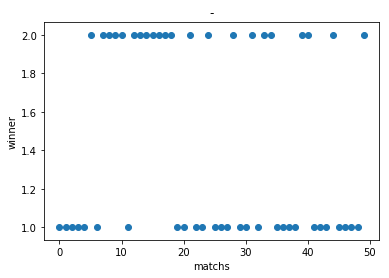

In [8]:
# create a figure and axis
fig, ax = plt.subplots()
train_p=train.head(50)
# scatter the sepal_length against the sepal_width
ax.scatter(train_p['index'], train_p['RESULT'])
# set a title and labels
ax.set_title('-')
ax.set_xlabel('matchs')
ax.set_ylabel('winner')

In [9]:
train=train[['ID1', 'ID2', 'ID_T', 'ID_R', 'RESULT','DATE']]

In [10]:
stat=pd.read_csv('stats.csv')

In [11]:
stat.head()

,Unnamed: 0,ID1,ID2,ID_T,ID_R,FS_1,FSOF_1,ACES_1,DF_1,UE_1,...,NAOF_2,TPW_2,FAST_2,A1S_2,A2S_2,RPW_1,RPWOF_1,RPW_2,RPWOF_2,MT
0,0,6431,7042,8961,4,46.0,70.0,19.0,3.0,NaN,...,NaN,70,NaN,NaN,NaN,27.0,79.0,18.0,70.0,1899-12-30 01:35:35
1,1,11923,4078,8961,4,40.0,70.0,8.0,1.0,NaN,...,NaN,73,NaN,NaN,NaN,41.0,91.0,23.0,70.0,1899-12-30 01:38:41
2,2,662,1621,8961,4,52.0,83.0,4.0,4.0,NaN,...,NaN,75,NaN,NaN,NaN,31.0,74.0,32.0,83.0,1899-12-30 01:42:36
3,3,7461,10320,8959,4,12.0,14.0,4.0,0.0,NaN,...,NaN,10,NaN,NaN,NaN,12.0,20.0,2.0,14.0,1899-12-30 00:21:11
4,4,12495,3996,8959,4,68.0,110.0,4.0,0.0,NaN,...,NaN,114,NaN,NaN,NaN,55.0,122.0,47.0,110.0,1899-12-30 02:38:00


In [12]:
stat_1=stat[['ID1','ID_T', 'ID_R','ACES_1']]

In [13]:
stat_2=stat[['ID2','ID_T', 'ID_R','ACES_2']]

In [14]:
table_1=pd.merge(train,stat_1,on=['ID1','ID_T','ID_R'])

In [15]:
table_2=pd.merge(train,stat_2,on=['ID2','ID_T','ID_R'])

### the tables now make sense

In [16]:
table=pd.merge(table_1,table_2,on=['ID1','ID2','ID_T','ID_R','RESULT'])

In [35]:
table

,ID1,ID2,ID_T,ID_R,RESULT,DATE_x,ACES_1,DATE_y,ACES_2
0,918,10828,8957,4,1,2012-01-31 00:00:00,1.0,2012-01-31 00:00:00,1.0
1,3316,2379,8957,4,1,2012-01-31 00:00:00,6.0,2012-01-31 00:00:00,3.0
2,7869,6277,8957,4,1,2012-01-31 00:00:00,8.0,2012-01-31 00:00:00,12.0
3,2107,7136,8957,4,2,2012-01-31 00:00:00,19.0,2012-01-31 00:00:00,14.0
4,678,72,8887,4,1,2012-01-31 00:00:00,11.0,2012-01-31 00:00:00,1.0
5,563,13796,8887,4,2,2012-01-31 00:00:00,7.0,2012-01-31 00:00:00,5.0
6,745,775,8888,4,2,2012-01-31 00:00:00,6.0,2012-01-31 00:00:00,1.0
7,75,1266,8888,4,2,2012-01-31 00:00:00,4.0,2012-01-31 00:00:00,7.0
8,749,7826,8888,4,2,2012-01-31 00:00:00,2.0,2012-01-31 00:00:00,0.0
9,638,13651,8888,4,1,2012-01-31 00:00:00,4.0,2012-01-31 00:00:00,0.0


In [18]:
table.columns

Index(['ID1', 'ID2', 'ID_T', 'ID_R', 'RESULT', 'DATE_x', 'ACES_1', 'DATE_y',
       'ACES_2'],
      dtype='object')

In [19]:
X=table[['ID1', 'ID2', 'ID_T', 'ID_R',  'ACES_1', 'ACES_2']].values
X

array([[9.1800e+02, 1.0828e+04, 8.9570e+03, 4.0000e+00, 1.0000e+00,
        1.0000e+00],
       [3.3160e+03, 2.3790e+03, 8.9570e+03, 4.0000e+00, 6.0000e+00,
        3.0000e+00],
       [7.8690e+03, 6.2770e+03, 8.9570e+03, 4.0000e+00, 8.0000e+00,
        1.2000e+01],
       ...,
       [2.5171e+04, 2.9939e+04, 1.2979e+04, 1.2000e+01, 1.0000e+01,
        3.0000e+00],
       [2.2560e+04, 4.6717e+04, 1.3125e+04, 1.0000e+01, 3.0000e+00,
        3.0000e+00],
       [1.2544e+04, 3.3502e+04, 1.3125e+04, 1.0000e+01, 7.0000e+00,
        6.0000e+00]])

In [20]:
y=table['RESULT'].astype(int)
y.dtype

dtype('int32')

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))
X

array([[-1.10050917, -0.36512826, -1.62855956, -0.23972344, -0.91033088,
        -0.69351711],
       [-0.88924173, -1.06947583, -1.62855956, -0.23972344,  0.25498406,
        -0.14754424],
       [-0.48811551, -0.74452059, -1.62855956, -0.23972344,  0.72111004,
         2.30933365],
       ...,
       [ 1.03621698,  1.22805276,  1.50070204,  2.42880459,  1.18723602,
        -0.14754424],
       [ 0.80618391,  2.62674414,  1.61429533,  1.76167258, -0.4442049 ,
        -0.14754424],
       [-0.07624091,  1.52508085,  1.61429533,  1.76167258,  0.48804705,
         0.67141506]])

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=8)

### using KNN ==> over fitting

In [71]:
k = 1
#Train Model and Predict  
while k<11:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    neigh
    yhat = neigh.predict(X_test)
    yhat 
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
    print("...........")
    k=k+1

Train set Accuracy:  1.0
Test set Accuracy:  0.5043866171003717
...........
Train set Accuracy:  0.7537510740961069
Test set Accuracy:  0.5063197026022305
...........
Train set Accuracy:  0.7543624826492167
Test set Accuracy:  0.49115241635687734
...........
Train set Accuracy:  0.6897184215744596
Test set Accuracy:  0.5003717472118959
...........
Train set Accuracy:  0.6891565866878181
Test set Accuracy:  0.49605947955390334
...........
Train set Accuracy:  0.6581895697005751
Test set Accuracy:  0.5003717472118959
...........
Train set Accuracy:  0.6571154735937603
Test set Accuracy:  0.49308550185873606
...........
Train set Accuracy:  0.6373851543393483
Test set Accuracy:  0.4945724907063197
...........
Train set Accuracy:  0.636938991341133
Test set Accuracy:  0.49070631970260226
...........
Train set Accuracy:  0.6247438693899134
Test set Accuracy:  0.4968029739776952
...........


### using Logistic Regression ==> test acc: 50.43% and train acc: 49.56%

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.49560446823980436
Test set Accuracy:  0.5043866171003717


c:\users\mountassir youssef\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
